In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 파일 한 번에 불러오기
# global 변수 사용하기
for i in range(1,8):
    globals()[f'case_{i}'] = pd.read_csv(f'case_{i}.csv', index_col=0)

# 함수 만들어보자

# 변경 내역: noise 4에서 5로
# mask 를 앞으로 +,- 1칸씩 추가

In [3]:
# 기울기 구하는 함수
# 리스트로 기울기 반환함
def diff_search(df_name):
    diff = []
    for i in range(len(df_name)):
        if i == 0:
            diff.append(0)
        else:
            # 데이터프레임 형태 달라지면 이거 바꿔야 함
            diff.append(df_name['1'][i] - df_name['1'][i-1])
    return diff

# 여기는 noise 제거하는 함수
def del_noise(diff_list):
    for i, diff in enumerate(diff_list):
        if -5 < diff < 5:
            diff_list[i] = 0
    return diff_list

def make_diff_list(diff_list):
    # 2. 기울기 0이 아닌 값 리스트에 넣기
    temp_list = []
    # i는 번째, diff는 기울기 값
    for i, diff in enumerate(diff_list):
        # 기울기가 0이면 넘어가기
        if diff == 0:
            continue
        # 기울기가 0이 아니면
        else:
            # temp_list에 기울기 집어넣기
            temp_list.append([i,diff])
    return temp_list

def make_pass_point(temp_list):
    pass_point = []

    for i in range(len(temp_list)):
        
        # 시작인 0번째 값 넣어주기
        if i == 0:
            pass_point.append(temp_list[i][0])
        # 사람이 지나갈 때 기울기는 -에서 +로 바뀜
        # +에서 -는 사람이 한 번 지나갔다는 걸 의미
        
        # 뒷부분에 i+1을 사용하므로 에러 뜨므로 브레이크 걸어주기
        if i+2 == len(temp_list):
            print(i+2)
            # 마지막 값 넣어주기
            pass_point.append(temp_list[-1][0])
            break

        if temp_list[i][1] > 0:
            # 곱이 마이너스라면
            if temp_list[i][1] * temp_list[i+1][1] < 0:
                #마이너스 시작 지점 저장하기
                pass_point.append(temp_list[i+1][0])
    return pass_point, temp_list

def fin_start_end(pass_point, temp_list):
    start = pass_point
    end = []

    # 첫 값인 140은 제외하기 위해 1부터 시작
    for i in range(1, len(temp_list)):
        if temp_list[i][0] in start:
            end.append(temp_list[i-1][0])
    # 맨 마지막 바로 앞 값이 들어가 있어서 pop으로 빼주기
    end.pop()
    end.append(pass_point.pop())
    return start, end

# 몇번째 케이스?
def find_fluc(n, start, end):
    globals()[f'case_{n}_fluc'] = []

    for i in range(len(start)):
        # 마스크 씌우고
        temp_start = start[i]-1
        temp_end = end[i]+1
        # 뽑기
        globals()[f'case_{n}_fluc'].append(globals()[f'case_{n}']['1'][temp_start:temp_end])

    return globals()[f'case_{n}_fluc']

In [4]:
# 변수 여러개 선언 후 불러오기
# global로 설정해서 불러오기

# 파일 한 번에 불러오기
# global 변수 사용하기
for i in range(1,8):
    globals()[f'case_{i}'] = pd.read_csv(f'case_{i}.csv', index_col=0)

# diff 찾기
for i in range(1,8):
    globals()[f'case_{i}_diff'] = diff_search(globals()[f'case_{i}'])

# 1
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_1_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(1, start, end)

#2
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_2_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(2, start, end)

#3
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_3_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(3, start, end)

#4
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_4_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(4, start, end)

#5
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_5_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(5, start, end)

#6
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_6_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(6, start, end)

#7
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_7_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(7, start, end)

124
118
93
87
210
201
198


[117    132.0
 118    127.0
 119    127.0
 120    127.0
 121    118.0
 122    118.0
 123    118.0
 124    118.0
 125    112.0
 126    112.0
 127     99.0
 128     99.0
 129     99.0
 130     99.0
 131     87.0
 132     87.0
 133     87.0
 134     85.0
 135     85.0
 136     85.0
 137     96.0
 138     96.0
 139     96.0
 140    103.0
 141    103.0
 142    103.0
 143    118.0
 144    118.0
 145    118.0
 146    134.0
 Name: 1, dtype: float64,
 204    129.0
 205    122.0
 206    122.0
 207    111.0
 208    111.0
 209     95.0
 210     95.0
 211     95.0
 212     80.0
 213     80.0
 214     80.0
 215     73.0
 216     73.0
 217     72.0
 218     72.0
 219     72.0
 220     88.0
 221     88.0
 222    108.0
 223    108.0
 224    108.0
 225    118.0
 226    118.0
 227    134.0
 Name: 1, dtype: float64,
 278    135.0
 279    119.0
 280    119.0
 281    119.0
 282    119.0
 283    119.0
 284    119.0
 285    119.0
 286    124.0
 287    124.0
 288    131.0
 Name: 1, dtype: float64,
 330    135.

# 그래프 그려서 정확하게 잘랐는지 확인하기

In [220]:
# 정확하게 잘랐는지 확인하기
# 1,2,3,5,6 정확하게 자름
for i in range(1,8):
    print(i,'번째'), print(len(globals()[f'case_{i}_fluc']))

1 번째
14
2 번째
15
3 번째
15
4 번째
14
5 번째
30
6 번째
25
7 번째
26


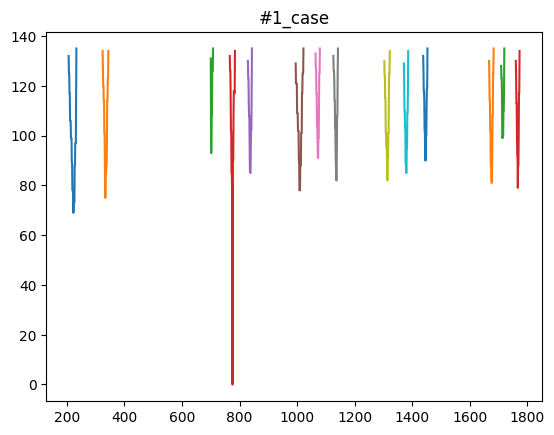

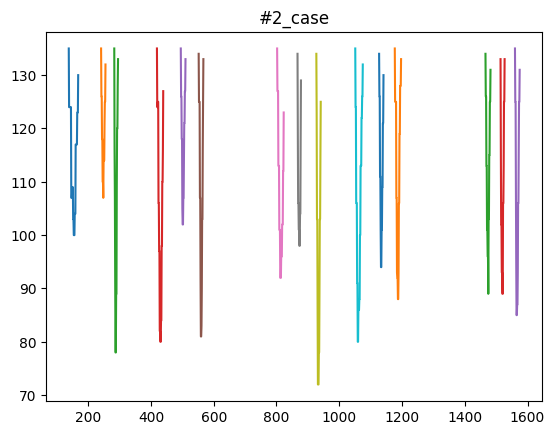

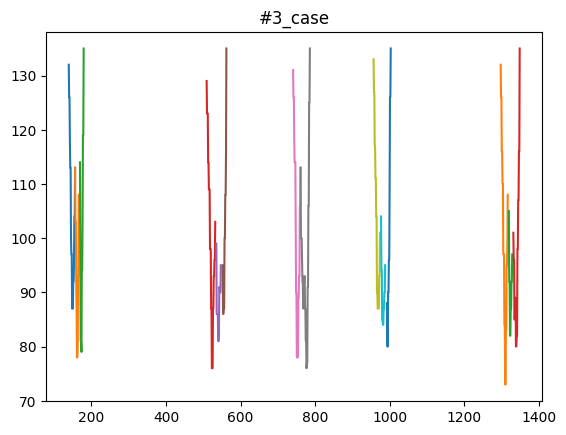

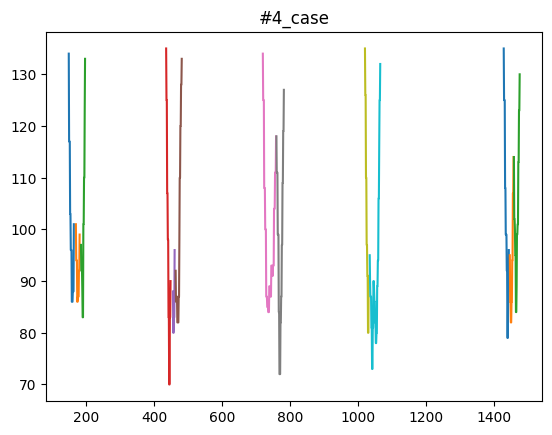

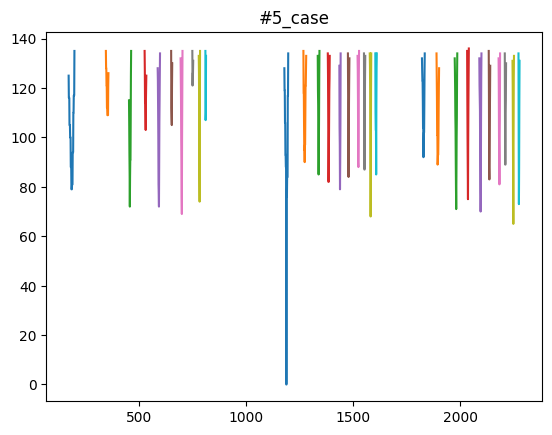

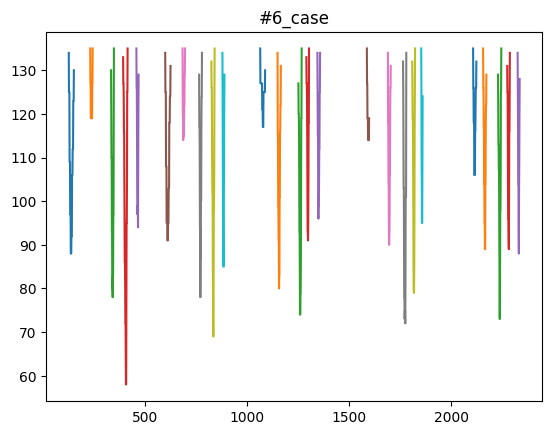

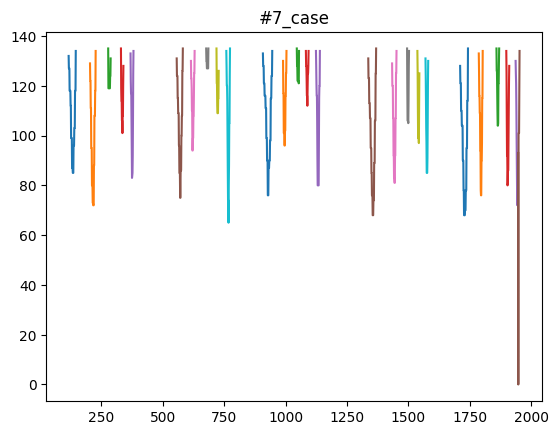

In [5]:
for i in range(1,8):
    graph = globals()[f'case_{i}_fluc']

    for j in range(len(graph)):
        plt.plot(graph[j])
    plt.title(f'#{i}_case')
    plt.savefig(f'#{i}_case_extraction.png')
    plt.show()

In [16]:
len(case_6_fluc)

25

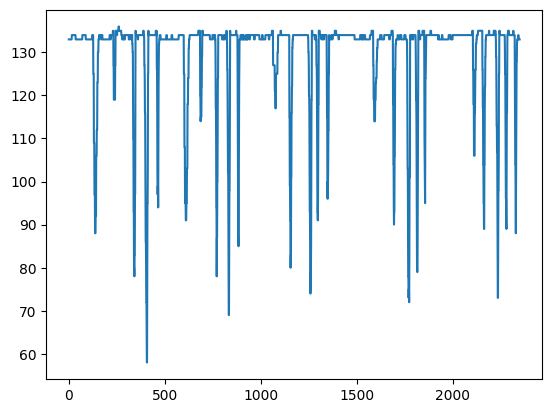

In [15]:
plt.plot(case_6['1'])

## 6번 추출하기

In [35]:
# 파이썬 시작은 0부터 하므로
# i를 1부터 25까지로 하도록 range 조절하고
temp_out_list = []
temp_in_list = []

for i in range(1,26):
    #out
    if i % 5 == 1 or i % 5 == 2 or i % 5 == 0:
        temp_out_list.append(case_6_fluc[i-1])
    if i % 5 == 3 or i % 5 == 4:
        temp_in_list.append(case_6_fluc[i-1])

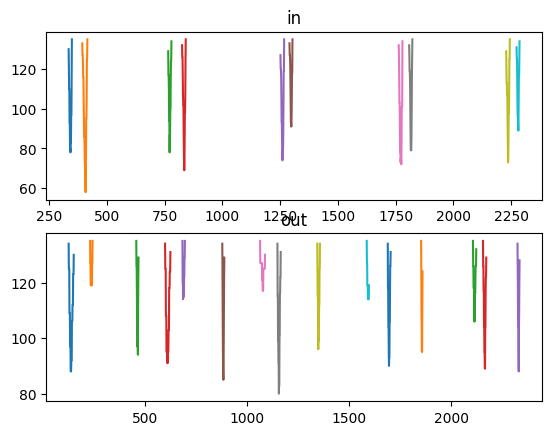

In [36]:
# 정확히 뽑힘
for i in range(len(temp_out_list)):
    try:
        plt.subplot(2, 1, 1) 
        plt.title('in')
        plt.plot(temp_in_list[i])
    
    except:
        pass

    plt.subplot(2, 1, 2)
    plt.title('out')
    plt.plot(temp_out_list[i])
plt.show()

# 7번 추출하기

In [45]:
# 하나 더 뽑힘
len(case_7_fluc)

26

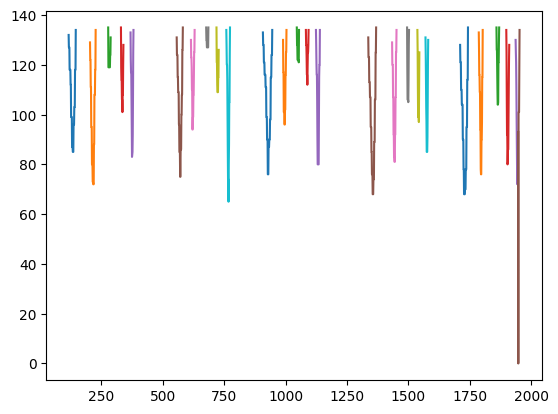

In [53]:
# 맨 뒤에게 2개로 갈림
for i in range(26):
    plt.plot(case_7_fluc[i])

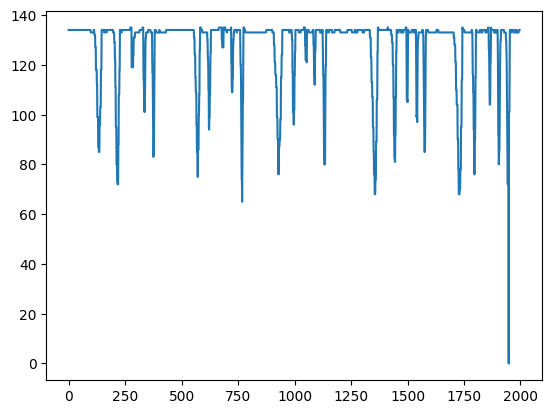

In [54]:
plt.plot(case_7['1'])

In [56]:
# 맨 뒤에게 2개로 갈림
case_7_fluc[-1]

1947     93.0
1948      0.0
1949    101.0
1950    101.0
1951    101.0
1952    118.0
1953    134.0
Name: 1, dtype: float64

In [61]:
case_7_fluc[-2]

1937    130.0
1938    125.0
1939    121.0
1940    112.0
1941    100.0
1942     88.0
1943     77.0
1944     72.0
1945     78.0
1946     78.0
1947     93.0
Name: 1, dtype: float64

In [64]:
# 파이썬 시작은 0부터 하므로
# i를 1부터 25까지로 하도록 range 조절하고
temp_out_list = []
temp_in_list = []

# 마지막 26번은 직접 집어넣을 예정
for i in range(1,26):
    # in
    if i % 5 == 1 or i % 5 == 2 or i % 5 == 0:
        temp_in_list.append(case_7_fluc[i-1])
    # out
    if i % 5 == 3 or i % 5 == 4:
        temp_out_list.append(case_7_fluc[i-1])

In [65]:
temp_in_list

[117    132.0
 118    127.0
 119    127.0
 120    127.0
 121    118.0
 122    118.0
 123    118.0
 124    118.0
 125    112.0
 126    112.0
 127     99.0
 128     99.0
 129     99.0
 130     99.0
 131     87.0
 132     87.0
 133     87.0
 134     85.0
 135     85.0
 136     85.0
 137     96.0
 138     96.0
 139     96.0
 140    103.0
 141    103.0
 142    103.0
 143    118.0
 144    118.0
 145    118.0
 146    134.0
 Name: 1, dtype: float64,
 204    129.0
 205    122.0
 206    122.0
 207    111.0
 208    111.0
 209     95.0
 210     95.0
 211     95.0
 212     80.0
 213     80.0
 214     80.0
 215     73.0
 216     73.0
 217     72.0
 218     72.0
 219     72.0
 220     88.0
 221     88.0
 222    108.0
 223    108.0
 224    108.0
 225    118.0
 226    118.0
 227    134.0
 Name: 1, dtype: float64,
 369    133.0
 370    122.0
 371    117.0
 372    117.0
 373    106.0
 374     95.0
 375     83.0
 376     84.0
 377     85.0
 378     92.0
 379    107.0
 380    125.0
 381    134.0
 Name: 1, 

In [67]:
temp_out_list

[278    135.0
 279    119.0
 280    119.0
 281    119.0
 282    119.0
 283    119.0
 284    119.0
 285    119.0
 286    124.0
 287    124.0
 288    131.0
 Name: 1, dtype: float64,
 330    135.0
 331    119.0
 332    114.0
 333    114.0
 334    106.0
 335    106.0
 336    101.0
 337    108.0
 338    108.0
 339    120.0
 340    128.0
 Name: 1, dtype: float64,
 677    135.0
 678    130.0
 679    130.0
 680    127.0
 681    127.0
 682    127.0
 683    127.0
 684    127.0
 685    127.0
 686    135.0
 Name: 1, dtype: float64,
 719    135.0
 720    121.0
 721    121.0
 722    112.0
 723    109.0
 724    109.0
 725    109.0
 726    115.0
 727    115.0
 728    126.0
 Name: 1, dtype: float64,
 1046    135.0
 1047    128.0
 1048    128.0
 1049    122.0
 1050    122.0
 1051    122.0
 1052    122.0
 1053    122.0
 1054    121.0
 1055    134.0
 Name: 1, dtype: float64,
 1083    134.0
 1084    128.0
 1085    128.0
 1086    123.0
 1087    116.0
 1088    116.0
 1089    112.0
 1090    119.0
 1091    125